# Master Admission

Take a look at the data in "admit-train.csv". The attribute "admit" indicates whether a student has been admitted to a Master's course. The attributes "gre" and "gpa" contain the results of certain exams. The attribute "rank" represents the reputation rank of the student's current university, where smaller ranks correspond to higher reputation.

In [1]:
import pandas as pd

# Read data into dataframe
df_train = pd.read_csv("admit-train.csv")

# Show data
df_train.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


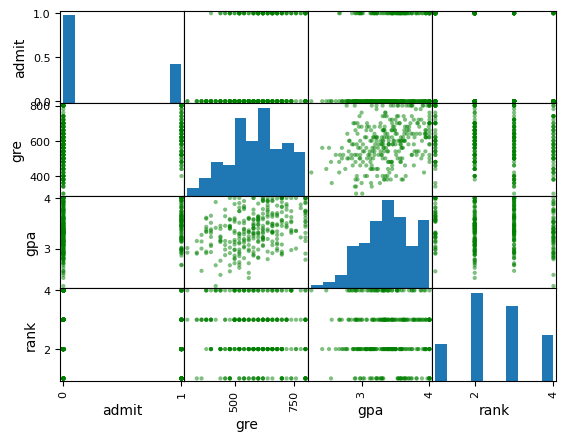

In [6]:
# create pairplot and get an overview of variable dependencies and distributions
pd.plotting.scatter_matrix(df_train, color="green");

## a)

Name the dependent variable and the independent variables.  
Which scales of measurement do the variables belong to? (e.g. nominal, ordinal, interval or ratio)

## b)

Use the statsmodels module and train a generalized linear model on the data from "admit-train.csv". 

In [21]:
import statsmodels.formula.api as smf

# Mark "rank" as categorical
df_train["rank"] = df_train["rank"].astype("category")

# Define and fit a model
logreg = smf.logit("admit ~ gre + gpa + rank", data=df_train)
result = logreg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547548
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.1129
Time:                        15:51:54   Log-Likelihood:                -163.72
converged:                       True   LL-Null:                       -184.56
Covariance Type:            nonrobust   LLR p-value:                 6.846e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8711      1.415     -3.444      0.001      -7.643      -2.099
rank[T.2]     -0.6255      0.

**Observation**: The categorical variable "rank" is represented by three different variables which indicate whether the rank has a certain value:
$$
rank[T.i] = \mathbb{I}[rank = i]
$$
For $rank = 1$, we don't need another variable since this case can be inferred if all other rank-variables are zero.

Which coefficients are statistically significant for a level of $\alpha=0.05$? 

## c)

Interpret the coefficients.

## d)

Test the significance of the attribute "rank" by using a Wald test. 

Is the attribute "rank" statistically significant w.r.t. a level of $\alpha = 5\%$?

In [22]:
# Specify the restrictions as a list of strings and pass it to "r_matrix"
wald_test_result = result.wald_test(
  	"(rank[T.2] = 0, rank[T.3] = 0, rank[T.4] = 0)", 
  	scalar=True
)
print(f"Test statistic (chi^2_{int(wald_test_result.df_denom)}-distributed): {wald_test_result.statistic}")
print(f"p-value of the statistic: {wald_test_result.pvalue}")

Test statistic (chi^2_3-distributed): 19.792977174387453
p-value of the statistic: 0.00018736312140189517


## e)

In order to gain a better understanding of the model, have a look at the predicted probabilities of some data points. Adjust only one parameter and keep the others constant. For example, keep "gre" and "gpa" constant (mean value), while varying "rank".

In [ ]:
# TODO

## f)

Find the McFadden ratio and interpret the results.

In [ ]:
# TODO

## g)

Load the test data from *admit-test.csv* and predict the probability.

In [ ]:
# TODO

Construct the confusion matrix for the test data.

In [ ]:
# TODO

## h)

Compute the accuracy 
$$
\frac{TP + TN}{TP + TN + FP + FN}
$$
of your trained model on the test set.

In [ ]:
# TODO